In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import pandas_datareader as pdr

import requests_cache
session = requests_cache.CachedSession(cache_name='stocks-cache', backend='sqlite')

In [2]:
ts = pdr.DataReader(
    'RUB=X',
    start='2000-01-01',
    end='2020-10-10',
    data_source='yahoo',
    session=session
).Close

ts.loc[ts < 1] = None

ts = ts.fillna(method='ffill').rename('RUB=X')

ts.index = pd.to_datetime(ts.index)

In [68]:
from fbprophet import Prophet
ts_tr = ts.loc[:'2019-01-01'].to_frame().reset_index().rename(columns={'Date': 'ds', 'RUB=X': 'y'})

m = Prophet()
m.fit(ts_tr);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


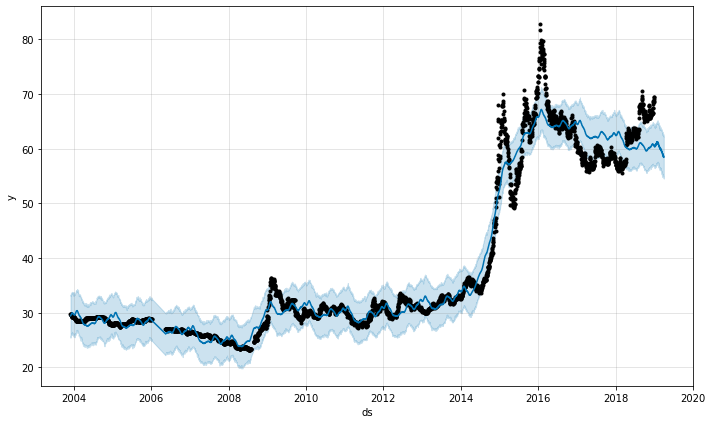

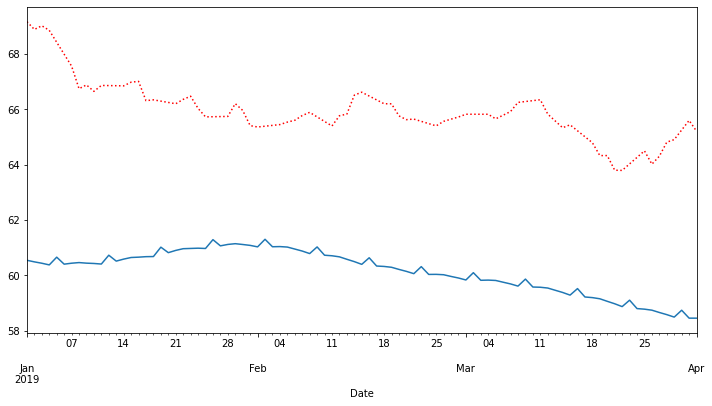

In [71]:
pred = m.predict(m.make_future_dataframe(90))

m.plot(pred)

plt.figure(figsize=(12,6))
pred.set_index('ds').yhat.loc['2019-01-01':].plot()
ts.loc['2019-01-01':'2019-04-01'].plot(color='red', style=':');